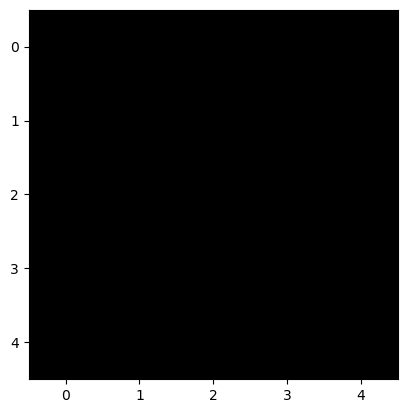

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.random.randint(0,1,(5,5,3)))

In [2]:
# Requires the ele2364 package

import time
import numpy as np
import matplotlib.pyplot as plt

import ele2364
from ele2364 import Memory
from ele2364.environments import Pendulum, FlappyBird, Lander
from ele2364.networks import DQ,V,CQ
from ele2364 import rbfprojector

from train_routines.Active_inference import ActiveInference_trainer
from models.networks import EnsembleModel,RewardModel

In [3]:
# TODO: Create environment
%matplotlib inline
from random import choice
#from tqdm.notebook import trange, tqdm
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from ele2364.networks import Mu, DQ,ttf

from train_routines.DDPG import DDPG
from ele2364 import Memory

import gymnasium as gym
env = gym.make('Acrobot-v1')


Actor=Mu(3,1)
Actor_target=Mu(3,1)
Critic=CQ(3,1)
Critic_target=CQ(3,1)
Critic_target.copyfrom(Critic)
Actor_target.copyfrom(Actor)
DATA=Memory(3,1)

trainer=DDPG(Actor,Critic,Actor_target,Critic_target,0.99,env,Memory,100)

In [5]:
#time,learn_time,test_reward_history,reward_history=trainer.train(100)

stat_time_measure,stat_learn_time,stat_test_reward_history,stat_reward_history=[],[],[],[]
for i in range(5):
    env = gym.make('Acrobot-v1')

    Actor=Mu(6,1)
    Actor_target=Mu(6,1)
    Critic=CQ(6,1)
    Critic_target=CQ(6,1)
    Critic_target.copyfrom(Critic)
    Actor_target.copyfrom(Actor)
    DATA=Memory(6,1)

    trainer=DDPG(Actor,Critic,Actor_target,Critic_target,0.99,env,DATA,100)

    time_measure,learn_time,test_reward_history,reward_history=trainer.train(200)
    stat_time_measure.append(time_measure)
    stat_learn_time.append(learn_time)
    stat_test_reward_history.append(test_reward_history)
    stat_reward_history.append(reward_history)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

time to train 100 episodes in mean 1178.2476761817932 with standard deviation of 1742.0037812013231
algorithm learned to solve pendulum in mean 10.2 with standard deviation of 4.534313619501853


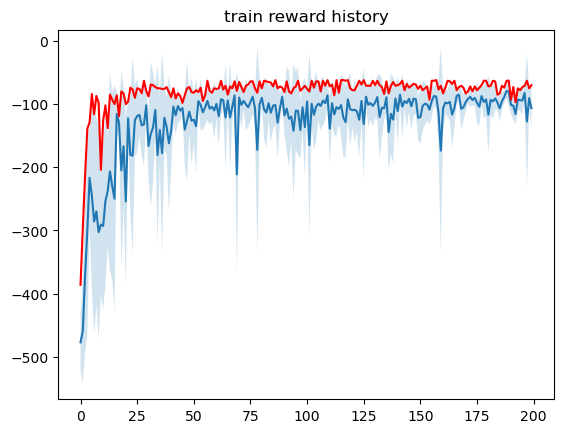

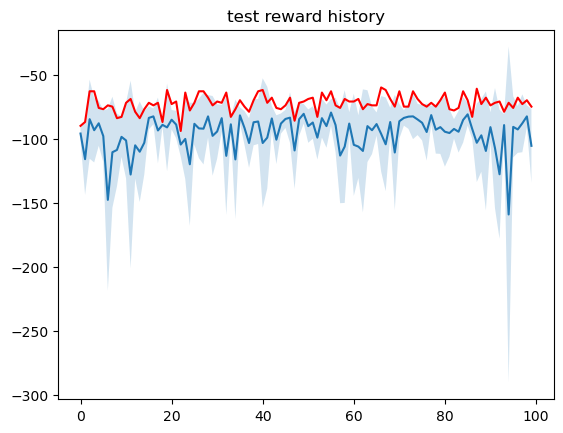

In [6]:
(test_reward_history)

print(f"time to train 100 episodes in mean {np.mean(np.array(stat_time_measure))} with standard deviation of {np.std(np.array(stat_time_measure))}")
print(f"algorithm learned to solve pendulum in mean {np.mean(np.array(stat_learn_time))} with standard deviation of {np.std(np.array(stat_learn_time))}")

r_mean=np.mean(np.array(stat_reward_history),axis=0)
r_std=np.std(np.array(stat_reward_history),axis=0)
fig, ax = plt.subplots()
ax.plot(np.mean(np.array(stat_reward_history),axis=0))
ax.plot(np.max(np.array(stat_reward_history),axis=0),'r')
ax.fill_between(np.arange(len(r_mean)), r_mean - r_std, r_mean + r_std, alpha=0.2)
plt.title("train reward history")
plt.show()

r_mean=np.mean(np.array(stat_test_reward_history),axis=0)
r_std=np.std(np.array(stat_test_reward_history),axis=0)
fig, ax = plt.subplots()
ax.plot(np.mean(np.array(stat_test_reward_history),axis=0))
ax.plot(np.max(np.array(stat_test_reward_history),axis=0),'r')
ax.fill_between(np.arange(len(r_mean)), r_mean - r_std, r_mean + r_std, alpha=0.2)
plt.title("test reward history")
plt.show()


In [8]:
stat_time_measure,stat_learn_time,stat_test_reward_history,stat_reward_history=[],[],[],[]
for i in range(5):
    env = gym.make('Acrobot')

    Actor=Mu(6,1)
    Actor_target=Mu(6,1)
    Critic=CQ(6,1)
    Critic_target=CQ(6,1)
    Critic_target.copyfrom(Critic)
    Actor_target.copyfrom(Actor)
    DATA=Memory(6,1)

    trainer=DDPG(Actor,Critic,Actor_target,Critic_target,0.99,env,DATA,100)

    time_measure,learn_time,test_reward_history,reward_history=trainer.train(200)
    stat_time_measure.append(time_measure)
    stat_learn_time.append(learn_time)
    stat_test_reward_history.append(test_reward_history)
    stat_reward_history.append(reward_history)

c:\Users\grmc1\Anaconda3\envs\ELE2364\Lib\site-packages\gymnasium\envs\registration.py:527: UserWarning: WARN: Using the latest versioned environment `Acrobot-v1` instead of the unversioned environment `Acrobot`.
  logger.warn(


  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

time to train 100 episodes in mean 434.1828188896179 with standard deviation of 164.1005008946645
algorithm learned to solve pendulum in mean 24.2 with standard deviation of 21.11302915263464


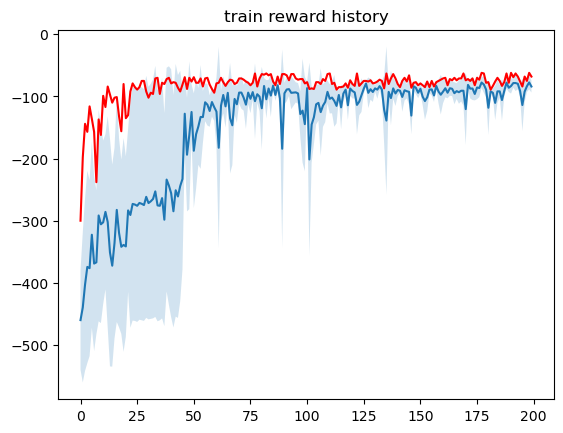

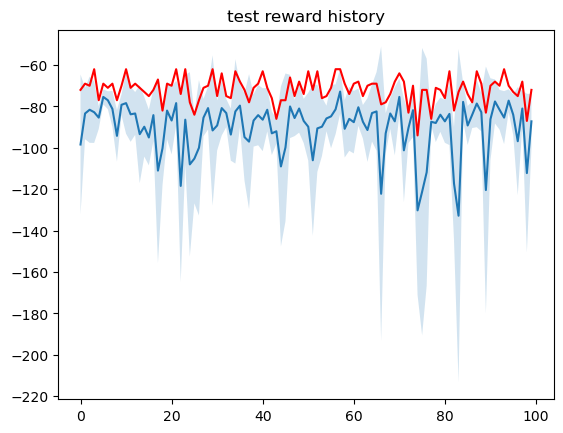

In [9]:
(test_reward_history)

print(f"time to train 100 episodes in mean {np.mean(np.array(stat_time_measure))} with standard deviation of {np.std(np.array(stat_time_measure))}")
print(f"algorithm learned to solve pendulum in mean {np.mean(np.array(stat_learn_time))} with standard deviation of {np.std(np.array(stat_learn_time))}")

r_mean=np.mean(np.array(stat_reward_history),axis=0)
r_std=np.std(np.array(stat_reward_history),axis=0)
fig, ax = plt.subplots()
ax.plot(np.mean(np.array(stat_reward_history),axis=0))
ax.plot(np.max(np.array(stat_reward_history),axis=0),'r')
ax.fill_between(np.arange(len(r_mean)), r_mean - r_std, r_mean + r_std, alpha=0.2)
plt.title("train reward history")
plt.show()

r_mean=np.mean(np.array(stat_test_reward_history),axis=0)
r_std=np.std(np.array(stat_test_reward_history),axis=0)
fig, ax = plt.subplots()
ax.plot(np.mean(np.array(stat_test_reward_history),axis=0))
ax.plot(np.max(np.array(stat_test_reward_history),axis=0),'r')
ax.fill_between(np.arange(len(r_mean)), r_mean - r_std, r_mean + r_std, alpha=0.2)
plt.title("test reward history")
plt.show()